# Chapter 4 - Training Models

MSE(θ) -> MSE(x,h_θ)


Palabras para este capítulo:
tweaks - ajustes
several - varias/varios
still - aún
switching  - transpuesta
setting - configuración
performs - realiza
straightforward - sencillo
pitfalls - trampas

## Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
# Creamos un folder para guardar las imágenes generadas (si es que no existe ya), y definimos la función save_fig() 
# que se utilizará para guardar las imágenes
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Regresión Lineal

Estudiaremos la regresión lineal. Uno de los algoritmos más simples. Se abordará de dos métodos de entrenamientos muy distintos:
- Utilizando una ecuación cerrada (closet-form equation) la cual calcula los parámetros del modelo que más se ajustan a los datos de entrenamiento (es decir, los parámetros del modelo que minimizan la función de costo sobre el conjunto de entrenamiento)
- Usando el Descenso del Gradiente (Gradient Descent "GD") el cual ajusta gradualmente los parámetros del modelo para minimizar la función de costo sobre el conjunto de entrenamiento. Eventualmente este método converge al mismo conjunto de parámetros que el primer método.

Después revisaremos la Regresión Polinómica, un modelo más complejo que puede abordar datos no lineales. Ya que este modelo tiene más parámetros que el modelo de Regresión Lineal, es más propenso a sobre ajustarse a los datos de entrenamiento. Por lo que estaremos aprendiendo a detectar si este es el caso o no, usando curvas de aprendizaje (learning curves), y después veremos varias técnicas de regularización que pueden reducir el riezgo de sobre ajuste en los datos de entrenamiento.

De manera general, un modelo lineal hace una predicción calculando la suma ponderada de las características de entreda, mas una constante llamada término de sesgo (o término de intersección)

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- $\hat{y}$ es el valor predicho.

- $n$ es el número de características.

- $x_i$ es el valor de la característica $i^{th}$.

- $\theta_j$ es el parémetro del modelo  $j^{th}$ (incluido el término de sesgo $\theta_0$ y la característica de pesos $\theta_1 + \theta_2 + ,..., + \theta_n$)

Esto puede escribirse de una forma más concisa usando la notación vectorial:



$$
\hat{y} = h_{\theta}(x) = \mathbf{\theta} \cdot \mathbf{x}
$$
(no se aprecia bien, pero $\theta$ está en negrita porque es un vector, igual que $\mathbf{x}$)

En esta ecuación:
- $\mathbf{\theta}$ es el vector de parámetros del modelo, que contiene el término de sesgo $\theta_0$ y los pesos de las características $\theta_1$ a $\theta_n$.
- $\mathbf{x}$ es el vector de características de la instancia, que contiene $x_0$ a $x_n$, con $x_0$ siempre igual a 1.
- $\mathbf{\theta} \cdot \mathbf{x}$ es el producto punto de los vectores $\theta$ y $\mathbf{x}$, que por supuesto es igual a $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$.
- $h_{\mathbf{\theta}}$ es la función de hipótesis, usando los parámetros del modelo $\theta$.

En machine learning, una función de hipótesis es una función matemática que representa el modelo que estás utilizando para hacer predicciones, es fundamental porque dedine cómo el modelo transforma las entradas en predicciones. En otras palabras, la función de hipótesis $ h_{\theta}(x)$ utiliza los parámetros $\theta$ y los valores de las características $\mathbf{x}$ para calcular la predicción de la salida.


OK, ese es el modelo de Regresión Lineal, pero ¿cómo lo entrenamos? Bueno, recordemos que entrenar un modelo significa ajustar sus parámetros para que el modelo se ajuste mejor al conjunto de entrenamiento. Para este propósito, primero necesitamos una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. En el Capítulo 2 vimos que la medida de rendimiento más común de un modelo de regresión es el Error Cuadrático Medio de la raíz $^{\textbf{[1]}}$ (Root Mean Square Error: RMSE). Por lo tanto, para entrenar un modelo de Regresión Lineal, necesitamos encontrar el valor de $\theta$ que minimice el RMSE. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE, y conduce al mismo resultado (porque el valor que minimiza una función también minimiza su raíz cuadrada).

El MSE de una hipótesis de Regresión Lineal $ h_\theta(x) $ en un conjunto de entrenamiento $\mathbf{X}$ se calcula usando la siguiente ecuación.

$$
\text{MSE}(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^\top x^{(i)} - y^{(i)})^2
$$


### La Ecuación Normal
Para encontrar el valor de $ \theta $ que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. Esto se llama la Ecuación Normal:

$$
\hat{\theta} = (X^\top X)^{-1} X^\top y
$$

En esta ecuación:
- $ \hat{\theta} $ es el valor de $ \theta $ que minimiza la función de costo.
- $ y $ es el vector de valores objetivo que contiene $ y_1 $ a $ y_n $.

Generemos algunos datos con apariencia lineal para probar esta ecuación:


In [11]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

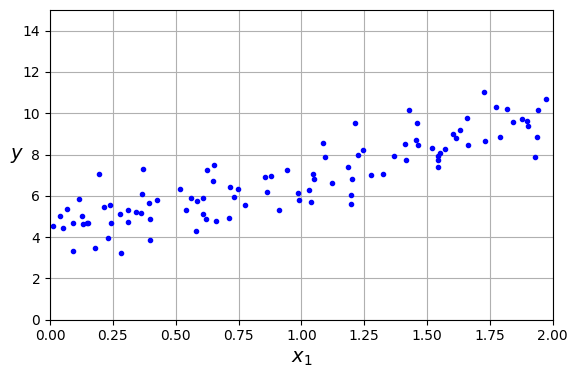

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

Ahora vamos a computar $\hat{\mathbf{\theta}}$ usando la Ecuación Normal. Vamos a utilizar la función inv() del módulo de álgebra lineal de Numpy (np.linalg) para copmutar la inversa de una matriz, y el método dot() para la multiplicación matricial: 

In [13]:

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # The @ operator performs matrix multiplication
                                                    # If A and B are NumPy arrays, then A @ B is equivalent to np.matmul(A, B)

La ecuación que usamos para generar la data es $y= 4+3x_1 +$ $ruido$ $gausiano$. Veamos qué encontró la ecuación:

In [14]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $\theta_0 = 4$ y $\theta_1 = 3$ en lugar de $\theta_0 = 4,215$ y $\theta_1=
2.770$. Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetos exactos de la función original. Cuanto más pequeño y ruidoso sea el conjunto de datos, más difícil se vuelve.

Ahora podemos hacer predicciones usando $\hat{\mathbf{\theta}}$:

In [15]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Vamos a graficar las predicciones del modelo

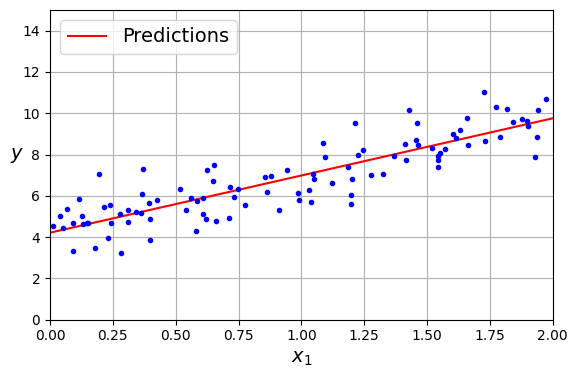

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

Realizar una regresión lineal utilizando Scikit-Learn es relativamente sencillo:

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Observe que Scikit-Learn separa el término de sesgo (intercept_) de la característica
pesos (coef_). La clase LinearRegression se basa en la función scipy.linalg.lstsq() (el nombre significa “mínimos cuadrados”), a la que puedes llamar directamente:

In [20]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula **$\mathbf{\hat{\theta} = X^+ y}$**, donde **$\mathbf{X^+}$** es la pseudoinversa de **$\mathbf{X}$** (específicamente, la inversa de Moore-Penrose). Puedes usar `np.linalg.pinv()` para calcular la pseudoinversa directamente:


In [21]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

La pseudoinversa se calcula utilizando una técnica estándar de factorización de matrices llamada *Descomposición en Valores Singulares* (SVD) que puede descomponer la matriz del conjunto de entrenamiento $\mathbf{X}$ en la multiplicación de tres matrices $\mathbf{U \Sigma V^\top}$ (ver `numpy.linalg.svd()`). La pseudoinversa se calcula como $\mathbf{X^+ = V \Sigma^+ U^\top}$. Para calcular la matriz $\mathbf{\Sigma^+}$, el algoritmo toma $\mathbf{\Sigma}$ y establece en cero todos los valores menores que un pequeño valor umbral, luego reemplaza todos los valores no nulos con sus inversos, y finalmente transpone la matriz resultante. Este enfoque es más eficiente que calcular la Ecuación Normal, además maneja bien los casos extremos: de hecho, la Ecuación Normal puede no funcionar si la matriz $\mathbf{X^\top X}$ no es invertible (es decir, singular), como si $m < n$ o si algunas características son redundantes, pero la pseudoinversa siempre está definida.



### Complejidad Computacional

La Ecuación Normal calcula la inversa de $\mathbf{X}^{\top}\mathbf{X}$, que es una matriz de $(n + 1) \times (n + 1)$ (donde $n$ es el número de características). La complejidad computacional de invertir dicha matriz es típicamente de alrededor de $O(n^{2.4})$ a $O(n^{3})$, dependiendo de la implementación. En otras palabras, si duplicas el número de características, multiplicas el tiempo de cálculo aproximadamente por $2^{2.4} = 5.3$ a $2^{3} = 8$. 

El enfoque de SVD utilizado por la clase `LinearRegression` de Scikit-Learn es de aproximadamente $O(n^{2})$. Si duplicas el número de características, multiplicas el tiempo de cálculo aproximadamente por $4$.

> **Advertencia**
> Tanto la Ecuación Normal como el enfoque SVD se vuelven muy lentos cuando el número de características crece mucho (por ejemplo, 100,000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son $O(m)$), por lo que manejan eficientemente conjuntos de entrenamiento grandes, siempre y cuando puedan caber en memoria.

 Además, una vez que has entrenado tu modelo de Regresión Lineal (usando la Ecuación Normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto tanto al número de instancias sobre las que quieres hacer predicciones como al número de características. En otras palabras, hacer predicciones sobre el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo.

 Ahora veremos una manera muy diferente de entrenar un modelo de Regresión Lineal, que es más adecuada para casos donde hay un gran número de características o demasiadas instancias de entrenamiento para caber en memoria.

## Descenso de Gradiente

El Descenso de Gradiente es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas para una amplia gama de problemas. La idea general del Descenso de Gradiente es ajustar los parámetros iterativamente para minimizar una función de costo.

Supongamos que estás perdido en las montañas en una densa niebla, y solo puedes sentir la pendiente del suelo bajo tus pies. Una buena estrategia para llegar al fondo del valle rápidamente es ir cuesta abajo en la dirección de la pendiente más pronunciada. Esto es exactamente lo que hace el Descenso de Gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros $\mathbf{\theta}$, y va en la dirección del gradiente descendente. ¡Una vez que el gradiente es cero, has alcanzado un mínimo!

Concretamente, comienzas llenando $\mathbf{\theta}$ con valores aleatorios (esto se llama inicialización aleatoria). Luego lo mejoras gradualmente, dando un paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo.



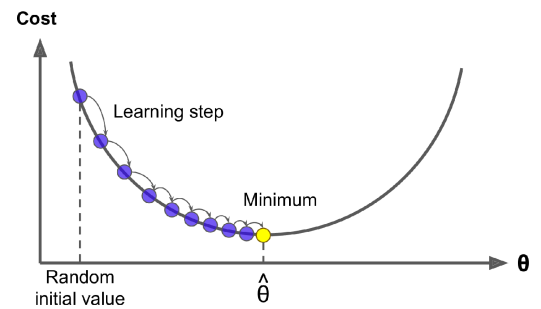

![image.png](attachment:image.png)

*En esta representación

 de Gradient Descent, los parámetros del modelo se inicializan aleatoriamente y se modifican repetidamente para minimizar la función de costos; El tamaño del paso de aprendizaje es proporcional a la pendiente de la función de costo, por lo que los pasos se hacen gradualmente más pequeños a medida que los parámetros se acercan al mínimo.*

Además, no todas las funciones de costo se parecen a cuencos regulares y bonitos. Puede haber agujeros, crestas, mesetas y todo tipo de terreno irregular, lo que hace difícil la convergencia al mínimo. La figura siguiente muestra los dos principales desafíos con gradient descent. Si la inicialización aleatoria comienza el algoritmo a la izquierda, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global. Si comienza a la derecha, tomará mucho tiempo cruzar la meseta. Y si te detienes demasiado pronto, nunca llegarás al mínimo global.

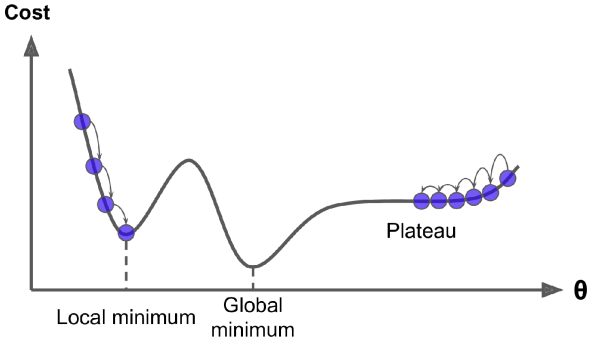

*Trampas del gradiente descendente*

Afortunadamente, la función de costo MSE para un modelo de regresión lineal resulta ser una función convexa, lo que significa que si eliges dos puntos cualesquiera en la curva, el segmento de línea que los une nunca está por debajo de la curva. Esto implica que no hay mínimos locales, solo un mínimo global. También es una función continua con una pendiente que nunca cambia abruptamente. Estos dos hechos tienen una gran consecuencia: el gradient descent está garantizado para acercarse arbitrariamente al mínimo global (si esperas lo suficiente y si la tasa de aprendizaje no es demasiado alta).

Mientras la función de costo tiene la forma de un cuenco, puede ser un cuenco alargado si las características tienen escalas muy diferentes. La Figura 4-7 muestra gradient descent en un conjunto de entrenamiento donde las características 1 y 2 tienen la misma escala (a la izquierda), y en un conjunto de entrenamiento donde la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha).

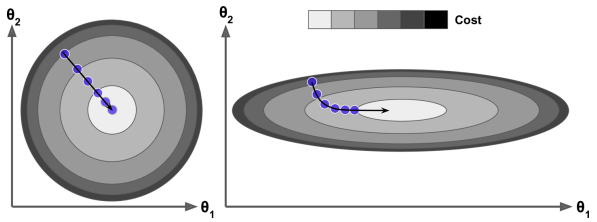

*Figura 4-7. Descenso de Gradiente con (izquierda) y sin (derecha) escalado de características
*

Como puedes ver, a la izquierda el algoritmo de gradient descent va directamente hacia el mínimo, alcanzándolo rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global, y termina con una larga marcha por un valle casi plano. Eventualmente llegará al mínimo, pero tomará mucho tiempo.

Al utilizar Gradient Descent, debe asegurarse de que todas las funciones tengan una escala similar (p. ej., usando la clase StandardScaler de Scikit-Learn), o tomará mucho más tiempo para converger.

Este diagrama también ilustra el hecho de que entrenar un modelo significa buscar una combinación de parámetros del modelo que minimice una función de costo (sobre el conjunto de entrenamiento). Es una búsqueda en el espacio de parámetros del modelo. Cuantos más parámetros tenga un modelo, más dimensiones tiene este espacio, y más difícil es la búsqueda: buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en 3 dimensiones. Afortunadamente, dado que la función de costo es convexa en el caso de la regresión lineal, la aguja está simplemente en el fondo del cuenco.

### Descenso de Gradiente por Lotes

Para implementar el Descenso de Gradiente, necesitas calcular el gradiente de la función de costo con respecto a cada parámetro del modelo $\mathbf{\theta_j}$. En otras palabras, necesitas calcular cuánto cambiará la función de costo si cambias $\mathbf{\theta_j}$ solo un poquito. Esto se llama derivada parcial. Es como preguntar “¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?” y luego hacer la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás dimensiones, si puedes imaginar un universo con más de tres dimensiones). La Ecuación 4-5 calcula la derivada parcial de la función de costo con respecto al parámetro $\mathbf{\theta_j}$, denotado $\frac{\partial}{\partial \mathbf{\theta_j}} MSE(\mathbf{\theta})$.

*Ecuación 4-5. Derivadas parciales de la función de costo*
$$
\frac{\partial}{\partial \theta_j} MSE(\mathbf{\theta}) = \frac{2}{m} \sum_{i=1}^m (\mathbf{\theta}^\top \mathbf{x^{(i)}} - y^{(i)}) x_j^{(i)}
$$

En lugar de calcular estas derivadas parciales individualmente, puedes usar la Ecuación 4-6 para calcularlas todas de una vez. El vector gradiente, denotado $\nabla MSE(\mathbf{\theta})$, contiene todas las derivadas parciales de la función de costo (una para cada parámetro del modelo).

*Ecuación 4-6. Vector gradiente de la función de costo*
$$
\nabla_\mathbf{\theta} MSE(\mathbf{\theta}) = 

\begin{pmatrix}
\frac{\partial}{\partial \theta_0} MSE(\mathbf{\theta}) \\
\frac{\partial}{\partial \theta_1} MSE(\mathbf{\theta}) \\
. \\
. \\
. \\

\frac{\partial}{\partial \theta_n} MSE(\mathbf{\theta})
\end{pmatrix} 

=\frac{2}{m} \mathbf{X}^\top (\mathbf{X\theta} - \mathbf{y})
$$

*ADVERTENCIA:* Observa que esta fórmula involucra cálculos sobre todo el conjunto de entrenamiento $\mathbf{X}$ en cada paso del Descenso de Gradiente. ¡Por eso el algoritmo se llama Descenso de Gradiente por Lotes: utiliza todo el lote de datos de entrenamiento en cada paso (de hecho, Descenso de Gradiente Completo sería un nombre mejor). Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes (pero veremos algoritmos de Descenso de Gradiente mucho más rápidos en breve). Sin embargo, el Descenso de Gradiente escala bien con el número de características; entrenar un modelo de Regresión Lineal cuando hay cientos de miles de características es mucho más rápido usando Descenso de Gradiente que usando la Ecuación Normal o descomposición SVD.

Una vez que tengas el vector gradiente, que apunta cuesta arriba, simplemente ve en la dirección opuesta para ir cuesta abajo. Esto significa restar $\nabla_\mathbf{\theta}  MSE(\mathbf{\theta})$ de $\mathbf{\theta}$. Aquí es donde entra en juego la tasa de aprendizaje $\eta$: multiplica el vector gradiente por $\eta$ para determinar el tamaño del paso cuesta abajo (Ecuación 4-7).

*Ecuación 4-7. Paso del Descenso de Gradiente*
$$
\mathbf{\theta}^{\text{(next step)}} = \mathbf{\theta} - \eta \nabla_\mathbf{\theta} MSE(\mathbf{\theta})
$$

Veamos una implementación rápida de este algoritmo:

$\boldsymbol{\theta}$

## Notas

$\textbf{[1]}$ 

En machine learning, el Root Mean Square Error (RMSE) se traduce al español como Error Cuadrático Medio de la Raíz. Es una métrica que se utiliza comúnmente para evaluar la precisión de un modelo de regresión. Se calcula como la raíz cuadrada de la media de los errores al cuadrado entre los valores predichos por el modelo y los valores reales del conjunto de datos.

En términos matemáticos, el RMSE se define como:

$$ \text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2} $$

donde:
- $ m $ es el número de ejemplos en el conjunto de datos.
- $ y_i $ son los valores reales del objetivo para el i-ésimo ejemplo.
- $ \hat{y}_i $ son los valores predichos por el modelo para el i-ésimo ejemplo.



La ecuación del Mean Squared Error (MSE) para evaluar un modelo de regresión es simplemente:

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$


El MSE calcula el promedio de los cuadrados de los errores entre las predicciones del modelo ($ \hat{y}_i $) y los valores reales ($ y_i $). Es una medida de la calidad de las predicciones del modelo, donde valores más bajos indican un mejor ajuste del modelo a los datos observados.



La principal diferencia entre RMSE y Mean Squared Error (MSE) radica en la interpretación de la métrica resultante:
- **MSE**: Es simplemente la media de los errores al cuadrado entre los valores predichos y los valores reales, sin la raíz cuadrada. Por lo tanto, MSE es más sensible a valores atípicos (outliers) en los datos, ya que los errores más grandes contribuyen de manera proporcionalmente mayor a la métrica.
- **RMSE**: Al tomar la raíz cuadrada del MSE, el RMSE proporciona una medida de error que está en la misma unidad que la variable objetivo original. Esto hace que sea más interpretable, ya que representa el error promedio en la misma escala que los datos originales, además penaliza de manera más significativa los errores grandes en comparación con el MSE.

